In [1]:
import mplfinance as mpf
import pandas as pd
import strat_v4_vectorized as strat
import matplotlib.pyplot as plt
import result_reader
import plotman

Lấy dữ liệu

In [2]:
filepath="stock_data_VN30/VCB.csv"
df = strat.load_and_filter_from_csv(filepath)

Thử với tín hiệu phân kỳ MACD

In [3]:
signal = "macd_divergence"
results = strat.b1s1(df, filepath, [signal])
result_reader.read_PnL_results(results["PnL"])

Đổi kết quả sang pandas Series
Profits        : count = 4 = 100.0%, mean = 68.47, max = 143.65, min = 5.00
Break-even     : count = 0 = 0.0%, mean = nan, max = nan, min = nan
Loss           : count = 0 = 0.0%, mean = nan, max = nan, min = nan
Total results  : count = 4 = 100.0%, mean = 68.47, max = 143.65, min = 5.00


{'profit_count': 4,
 'breakevent_count': 0,
 'loss_count': 0,
 'total_count': 4,
 'avg_PnL': np.float64(68.47378782560831)}

In [4]:
df[df[f'{signal}_buy_signals'].notna() | df[f'{signal}_sell_signals'].notna()]

,open,high,low,close,volume,buy_mark,sell_mark,macd,macdsignal,macdhist,macd_divergence_buy_signals,macd_divergence_sell_signals,price_low,macd_low,price_high,macd_high,p1,p2,i1,i2
time,,,,,,,,,,,,,,,,,,,,
2010-07-05,6.66,6.69,6.60,6.69,145630,NaN,NaN,0.052239,0.047429,0.004810,NaN,6.69,NaN,NaN,NaN,NaN,2010-05-04,2010-06-29,2010-05-05,2010-06-30
2011-09-13,6.25,6.39,6.25,6.30,355790,NaN,NaN,0.054424,0.060276,-0.005852,NaN,6.30,NaN,NaN,NaN,NaN,2011-07-28,2011-09-05,2011-07-29,2011-09-08
2012-04-25,7.89,7.89,7.72,7.77,560280,NaN,NaN,0.315384,0.295617,0.019767,NaN,7.77,NaN,NaN,NaN,NaN,2012-03-06,2012-04-18,2012-03-05,2012-04-20
2012-08-23,6.08,6.10,5.98,5.98,658510,NaN,NaN,-0.116578,-0.071022,-0.045556,NaN,5.98,NaN,NaN,NaN,NaN,2012-07-20,2012-08-20,2012-07-23,2012-08-20
2012-10-09,5.93,5.93,5.89,5.91,262470,5.91,NaN,-0.095117,-0.111628,0.016511,5.91,NaN,NaN,NaN,NaN,NaN,2012-09-11,2012-10-02,2012-09-12,2012-10-04
2015-02-10,10.78,10.92,10.75,10.78,592970,NaN,NaN,0.178962,0.243247,-0.064285,10.78,NaN,NaN,NaN,NaN,NaN,2014-12-19,2015-02-04,2014-12-25,2015-02-05
2015-11-12,14.37,14.43,14.13,14.40,879940,NaN,14.40,0.213385,0.224632,-0.011248,NaN,14.40,NaN,NaN,NaN,NaN,2015-10-12,2015-11-09,2015-10-15,2015-11-09
2016-01-27,12.49,12.49,12.25,12.25,582060,12.25,NaN,-0.230722,-0.229764,-0.000958,12.25,NaN,NaN,NaN,NaN,NaN,2015-12-08,2016-01-18,2015-12-11,2016-01-22
2016-09-01,16.49,16.64,15.58,15.88,3427730,NaN,15.88,0.163029,0.197536,-0.034507,NaN,15.88,NaN,NaN,NaN,NaN,2016-07-14,2016-08-29,2016-07-19,2016-08-29


Vẽ biểu đồ gồm tín hiệu mua bán và đường phân kỳ

/home/yoru/project2/.venv/lib/python3.12/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


171 186 172 188
738 769 742 770


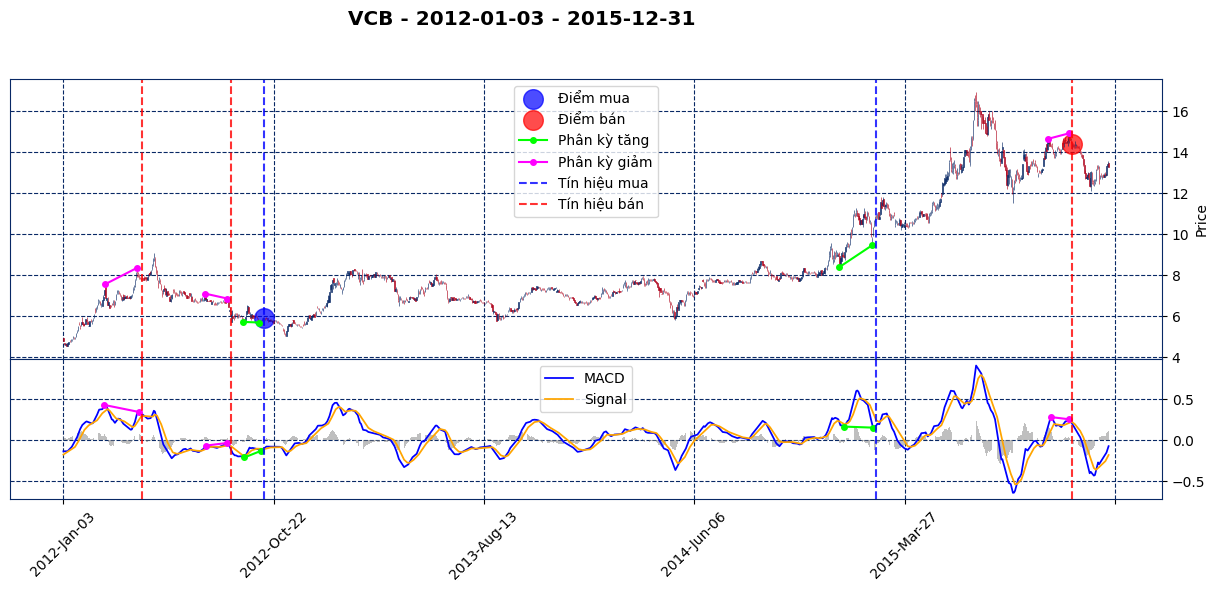

In [5]:
plotman.plot_divergence_onesignal(df.loc['2012-01-01':'2016-01-01'], signal, filepath)

In [10]:
signal = "stoch_crossover"
results = strat.b1s1(df, filepath, [signal])
result_reader.read_PnL_results(results["PnL"])

Đổi kết quả sang pandas Series
Profits        : count = 19 = 79.2%, mean = 11.31, max = 62.39, min = 0.44
Break-even     : count = 0 = 0.0%, mean = nan, max = nan, min = nan
Loss           : count = 5 = 20.8%, mean = -7.19, max = -1.89, min = -14.33
Total results  : count = 24 = 100.0%, mean = 7.46, max = 62.39, min = -14.33


{'profit_count': 19,
 'breakevent_count': 0,
 'loss_count': 5,
 'total_count': 24,
 'avg_PnL': np.float64(7.455991611000315)}

In [11]:
df[df[f'{signal}_buy_signals'].notna() | df[f'{signal}_sell_signals'].notna()]

,open,high,low,close,volume,buy_mark,sell_mark,macd,macdsignal,macdhist,...,p2,i1,i2,rsi,macd_crossover_buy_signals,macd_crossover_sell_signals,slowk,slowd,stoch_crossover_buy_signals,stoch_crossover_sell_signals
time,,,,,,,,,,,,,,,,,,,,,
2009-11-30,6.87,7.04,6.82,7.04,715590,7.04,NaN,-0.336042,-0.270897,-0.065145,...,NaT,NaT,NaT,40.453747,NaN,NaN,29.698536,13.726672,7.04,NaN
2010-01-07,7.36,7.38,7.21,7.21,207490,NaN,7.21,0.053665,-0.011360,0.065025,...,NaT,NaT,NaT,50.900709,NaN,NaN,59.405063,76.646997,NaN,7.21
2010-02-03,6.59,6.67,6.56,6.67,334020,6.67,NaN,-0.160666,-0.149744,-0.010921,...,NaT,NaT,NaT,46.272806,NaN,NaN,16.969465,7.001787,6.67,NaN
2010-03-03,7.28,7.36,7.21,7.33,200550,NaN,7.33,0.149567,0.064469,0.085098,...,NaT,NaT,NaT,59.829730,NaN,NaN,77.485380,88.011696,NaN,7.33
2010-04-22,6.73,6.97,6.72,6.89,210380,6.89,NaN,-0.082624,-0.069039,-0.013585,...,NaT,NaT,NaT,48.157017,NaN,NaN,22.480620,9.302326,6.89,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-21,60.00,60.33,59.67,60.07,1711594,60.07,NaN,0.190466,0.400807,-0.210341,...,NaT,NaT,NaT,52.165647,NaN,NaN,28.651076,20.578851,60.07,NaN
2023-08-29,58.19,59.20,58.13,59.13,1393114,NaN,NaN,-0.307089,-0.067464,-0.239626,...,NaT,NaT,NaT,49.063099,NaN,NaN,25.695343,16.323137,59.13,NaN
2023-10-09,57.12,57.12,56.19,56.59,1097445,NaN,NaN,-0.649961,-0.411218,-0.238744,...,NaT,NaT,NaT,36.363588,NaN,NaN,16.666667,15.421875,56.59,NaN


[<Axes: ylabel='Price'>, <Axes: >, <Axes: >, <Axes: >]


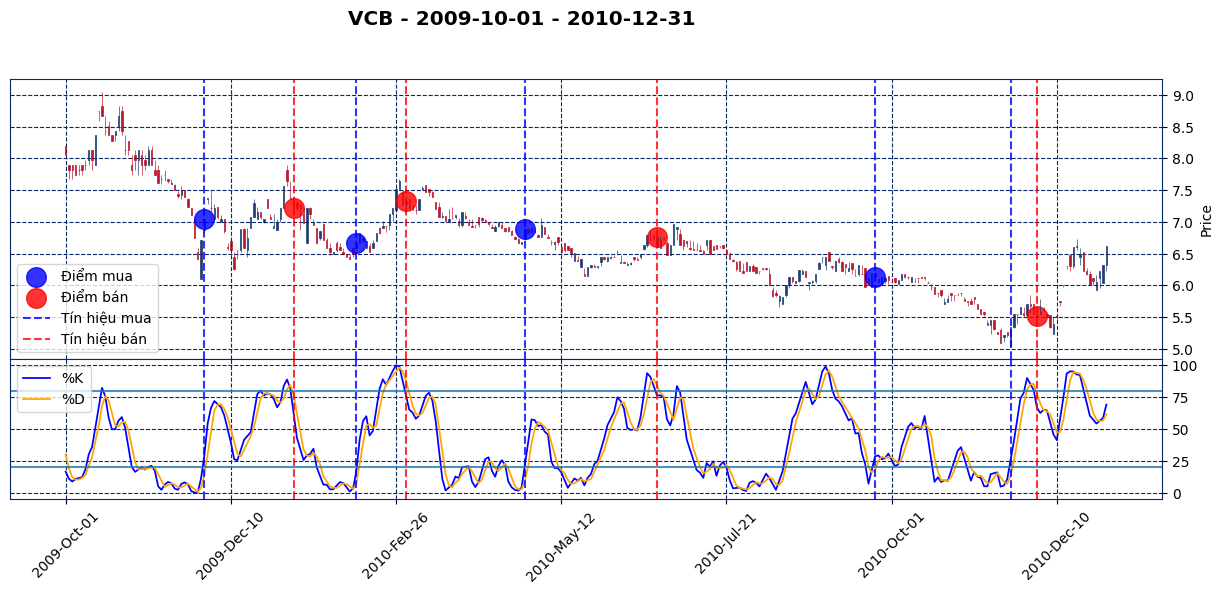

In [14]:
plotman.plot_crossover(df.loc['2009-10-01':'2011-01-01'], "stoch", filepath)